# Malaysia Prison System Data Generator

This notebook generates synthetic data for the Malaysia prison predictive planning system.
The data includes prison population, staffing, and resource utilization metrics.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
import os

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

print("Libraries imported successfully")

Libraries imported successfully


## 1. Generate Prison Population Data

In [3]:
def generate_population_data(start_date='2019-01-01', periods=84):
    """
    Generate synthetic prison population data for Malaysia
    """
    dates = pd.date_range(start=start_date, periods=periods, freq='M')
    
    # Base population with trend and seasonality
    base_population = 75000  # Approximate Malaysia prison population
    trend = np.linspace(0, 5000, periods)  # Gradual increase
    seasonal = 2000 * np.sin(2 * np.pi * np.arange(periods) / 12)  # Annual seasonality
    noise = np.random.normal(0, 1000, periods)
    
    total_prisoners = base_population + trend + seasonal + noise
    total_prisoners = np.maximum(total_prisoners, 60000)  # Minimum threshold
    
    # Generate demographic breakdowns
    male_ratio = np.random.normal(0.85, 0.02, periods)
    male_prisoners = (total_prisoners * male_ratio).astype(int)
    female_prisoners = total_prisoners.astype(int) - male_prisoners
    
    # Age groups
    young_ratio = np.random.normal(0.25, 0.03, periods)
    middle_ratio = np.random.normal(0.55, 0.03, periods)
    old_ratio = 1 - young_ratio - middle_ratio
    
    young_prisoners = (total_prisoners * young_ratio).astype(int)
    middle_prisoners = (total_prisoners * middle_ratio).astype(int)
    old_prisoners = total_prisoners.astype(int) - young_prisoners - middle_prisoners
    
    # Crime types (Malaysian context)
    drug_crimes_ratio = np.random.normal(0.35, 0.05, periods)
    violent_crimes_ratio = np.random.normal(0.25, 0.03, periods)
    property_crimes_ratio = np.random.normal(0.20, 0.03, periods)
    other_crimes_ratio = 1 - drug_crimes_ratio - violent_crimes_ratio - property_crimes_ratio
    
    drug_crimes = (total_prisoners * drug_crimes_ratio).astype(int)
    violent_crimes = (total_prisoners * violent_crimes_ratio).astype(int)
    property_crimes = (total_prisoners * property_crimes_ratio).astype(int)
    other_crimes = total_prisoners.astype(int) - drug_crimes - violent_crimes - property_crimes
    
    # Sentence lengths (in months)
    avg_sentence_months = np.random.normal(36, 6, periods)
    avg_sentence_months = np.maximum(avg_sentence_months, 12)  # Minimum 1 year
    
    # Release and admission rates
    monthly_releases = np.random.poisson(2800, periods)  # Average monthly releases
    monthly_admissions = np.random.poisson(3000, periods)  # Average monthly admissions
    
    # Create DataFrame
    population_data = pd.DataFrame({
        'date': dates,
        'total_prisoners': total_prisoners.astype(int),
        'male_prisoners': male_prisoners,
        'female_prisoners': female_prisoners,
        'young_prisoners': young_prisoners,
        'middle_prisoners': middle_prisoners,
        'old_prisoners': old_prisoners,
        'drug_crimes': drug_crimes,
        'violent_crimes': violent_crimes,
        'property_crimes': property_crimes,
        'other_crimes': other_crimes,
        'avg_sentence_months': avg_sentence_months,
        'monthly_releases': monthly_releases,
        'monthly_admissions': monthly_admissions
    })
    
    return population_data

# Generate population data
population_df = generate_population_data()
print(f"Generated population data: {population_df.shape}")
population_df.head()

Generated population data: (84, 14)


C:\Users\MARVINRAJ\AppData\Local\Temp\ipykernel_16184\2945710550.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start=start_date, periods=periods, freq='M')


,date,total_prisoners,male_prisoners,female_prisoners,young_prisoners,middle_prisoners,old_prisoners,drug_crimes,violent_crimes,property_crimes,other_crimes,avg_sentence_months,monthly_releases,monthly_admissions
0,2019-01-31,75496,62951,12545,18318,46329,10849,23307,23541,13625,15023,40.982015,2739,3045
1,2019-02-28,75921,63771,12150,17263,44108,14550,25352,22978,14074,13517,30.863497,2781,2997
2,2019-03-31,77500,67294,10206,17306,39092,21102,28725,18796,14122,15857,36.429397,2822,3045
3,2019-04-30,78703,67415,11288,17749,42143,18811,25327,21969,13700,17707,33.134055,2834,2988
4,2019-05-31,76738,64414,12324,19007,45123,12608,23703,20670,15459,16906,38.873879,2756,2956


## 2. Generate Staffing Data

In [4]:
def generate_staffing_data(population_data):
    """
    Generate staffing data based on prison population
    """
    dates = population_data['date']
    total_prisoners = population_data['total_prisoners']
    
    # Staff-to-prisoner ratio (approximately 1:3 to 1:4)
    base_ratio = 0.28
    ratio_variation = np.random.normal(0, 0.02, len(dates))
    staff_ratio = base_ratio + ratio_variation
    
    total_staff = (total_prisoners * staff_ratio).astype(int)
    
    # Staff categories
    security_staff_ratio = np.random.normal(0.65, 0.03, len(dates))
    admin_staff_ratio = np.random.normal(0.15, 0.02, len(dates))
    medical_staff_ratio = np.random.normal(0.08, 0.01, len(dates))
    other_staff_ratio = 1 - security_staff_ratio - admin_staff_ratio - medical_staff_ratio
    
    security_staff = (total_staff * security_staff_ratio).astype(int)
    admin_staff = (total_staff * admin_staff_ratio).astype(int)
    medical_staff = (total_staff * medical_staff_ratio).astype(int)
    other_staff = total_staff - security_staff - admin_staff - medical_staff
    
    # Shift patterns
    day_shift_ratio = np.random.normal(0.45, 0.02, len(dates))
    evening_shift_ratio = np.random.normal(0.35, 0.02, len(dates))
    night_shift_ratio = 1 - day_shift_ratio - evening_shift_ratio
    
    day_shift_staff = (total_staff * day_shift_ratio).astype(int)
    evening_shift_staff = (total_staff * evening_shift_ratio).astype(int)
    night_shift_staff = total_staff - day_shift_staff - evening_shift_staff
    
    # Staff utilization and overtime
    overtime_hours = np.random.normal(120, 20, len(dates))  # Average monthly overtime per staff
    overtime_hours = np.maximum(overtime_hours, 60)
    
    sick_leave_rate = np.random.normal(0.08, 0.02, len(dates))  # 8% average sick leave
    vacation_rate = np.random.normal(0.12, 0.02, len(dates))  # 12% average vacation
    
    available_staff = total_staff * (1 - sick_leave_rate - vacation_rate)
    
    staffing_data = pd.DataFrame({
        'date': dates,
        'total_staff': total_staff,
        'security_staff': security_staff,
        'admin_staff': admin_staff,
        'medical_staff': medical_staff,
        'other_staff': other_staff,
        'day_shift_staff': day_shift_staff,
        'evening_shift_staff': evening_shift_staff,
        'night_shift_staff': night_shift_staff,
        'overtime_hours': overtime_hours,
        'sick_leave_rate': sick_leave_rate,
        'vacation_rate': vacation_rate,
        'available_staff': available_staff.astype(int),
        'staff_prisoner_ratio': staff_ratio
    })
    
    return staffing_data

# Generate staffing data
staffing_df = generate_staffing_data(population_df)
print(f"Generated staffing data: {staffing_df.shape}")
staffing_df.head()

Generated staffing data: (84, 14)


,date,total_staff,security_staff,admin_staff,medical_staff,other_staff,day_shift_staff,evening_shift_staff,night_shift_staff,overtime_hours,sick_leave_rate,vacation_rate,available_staff,staff_prisoner_ratio
0,2019-01-31,21435,14352,3353,1651,2079,9760,8427,3248,153.398090,0.077997,0.113304,17334,0.283930
1,2019-02-28,22334,13460,3538,2065,3271,10193,7546,4595,127.893431,0.075927,0.111927,18138,0.294180
2,2019-03-31,21560,14969,3929,1579,1083,9413,7865,4282,96.082339,0.062440,0.100898,18038,0.278205
3,2019-04-30,24303,16803,3865,2012,1623,11418,8651,4234,128.892053,0.063462,0.128472,19638,0.308802
4,2019-05-31,20448,12907,2967,1465,3109,9130,7689,3629,143.932630,0.075470,0.161250,15607,0.266472


## 3. Generate Resource Data

In [5]:
def generate_resource_data(population_data):
    """
    Generate resource utilization and cost data
    """
    dates = population_data['date']
    total_prisoners = population_data['total_prisoners']
    
    # Capacity utilization
    total_capacity = 95000  # Total capacity of Malaysia prison system
    capacity_utilization = (total_prisoners / total_capacity) * 100
    
    # Daily costs per prisoner (in MYR)
    base_daily_cost = 45  # Approximately 45 MYR per prisoner per day
    daily_cost_variation = np.random.normal(0, 3, len(dates))
    daily_cost_per_prisoner = base_daily_cost + daily_cost_variation
    
    monthly_food_cost = total_prisoners * daily_cost_per_prisoner * 30 * 0.4  # 40% for food
    monthly_medical_cost = total_prisoners * daily_cost_per_prisoner * 30 * 0.15  # 15% for medical
    monthly_utility_cost = total_prisoners * daily_cost_per_prisoner * 30 * 0.20  # 20% for utilities
    monthly_other_cost = total_prisoners * daily_cost_per_prisoner * 30 * 0.25  # 25% for other
    
    total_monthly_cost = monthly_food_cost + monthly_medical_cost + monthly_utility_cost + monthly_other_cost
    
    # Infrastructure metrics
    maintenance_cost = np.random.normal(500000, 100000, len(dates))  # Monthly maintenance
    maintenance_cost = np.maximum(maintenance_cost, 200000)
    
    # Resource efficiency metrics
    food_waste_rate = np.random.normal(0.12, 0.03, len(dates))  # 12% average food waste
    energy_efficiency = np.random.normal(0.75, 0.05, len(dates))  # Energy efficiency score
    
    # Equipment and supplies
    medical_supplies_cost = total_prisoners * np.random.normal(8, 1, len(dates))  # Monthly per prisoner
    security_equipment_cost = np.random.normal(150000, 30000, len(dates))  # Monthly security equipment
    
    resource_data = pd.DataFrame({
        'date': dates,
        'capacity_utilization': capacity_utilization,
        'total_capacity': total_capacity,
        'daily_cost_per_prisoner': daily_cost_per_prisoner,
        'monthly_food_cost': monthly_food_cost,
        'monthly_medical_cost': monthly_medical_cost,
        'monthly_utility_cost': monthly_utility_cost,
        'monthly_other_cost': monthly_other_cost,
        'total_monthly_cost': total_monthly_cost,
        'maintenance_cost': maintenance_cost,
        'food_waste_rate': food_waste_rate,
        'energy_efficiency': energy_efficiency,
        'medical_supplies_cost': medical_supplies_cost,
        'security_equipment_cost': security_equipment_cost
    })
    
    return resource_data

# Generate resource data
resource_df = generate_resource_data(population_df)
print(f"Generated resource data: {resource_df.shape}")
resource_df.head()

Generated resource data: (84, 14)


,date,capacity_utilization,total_capacity,daily_cost_per_prisoner,monthly_food_cost,monthly_medical_cost,monthly_utility_cost,monthly_other_cost,total_monthly_cost,maintenance_cost,food_waste_rate,energy_efficiency,medical_supplies_cost,security_equipment_cost
0,2019-01-31,79.469474,95000,47.128355,4.269603e+07,1.601101e+07,2.134801e+07,2.668502e+07,1.067401e+08,429159.323309,0.095712,0.779678,502360.128761,112826.787730
1,2019-02-28,79.916842,95000,43.693541,3.980709e+07,1.492766e+07,1.990354e+07,2.487943e+07,9.951772e+07,348628.560739,0.132722,0.602981,545169.124032,105974.242027
2,2019-03-31,81.578947,95000,46.539317,4.328157e+07,1.623059e+07,2.164078e+07,2.705098e+07,1.082039e+08,319686.032374,0.105785,0.782795,583092.882300,154942.825237
3,2019-04-30,82.845263,95000,44.221360,4.176424e+07,1.566159e+07,2.088212e+07,2.610265e+07,1.044106e+08,341586.405699,0.119566,0.759737,698441.051690,151526.631056
4,2019-05-31,80.776842,95000,47.216431,4.347953e+07,1.630483e+07,2.173977e+07,2.717471e+07,1.086988e+08,526712.665101,0.136389,0.749065,634052.431265,155200.249931


## 4. Data Exploration and Visualization

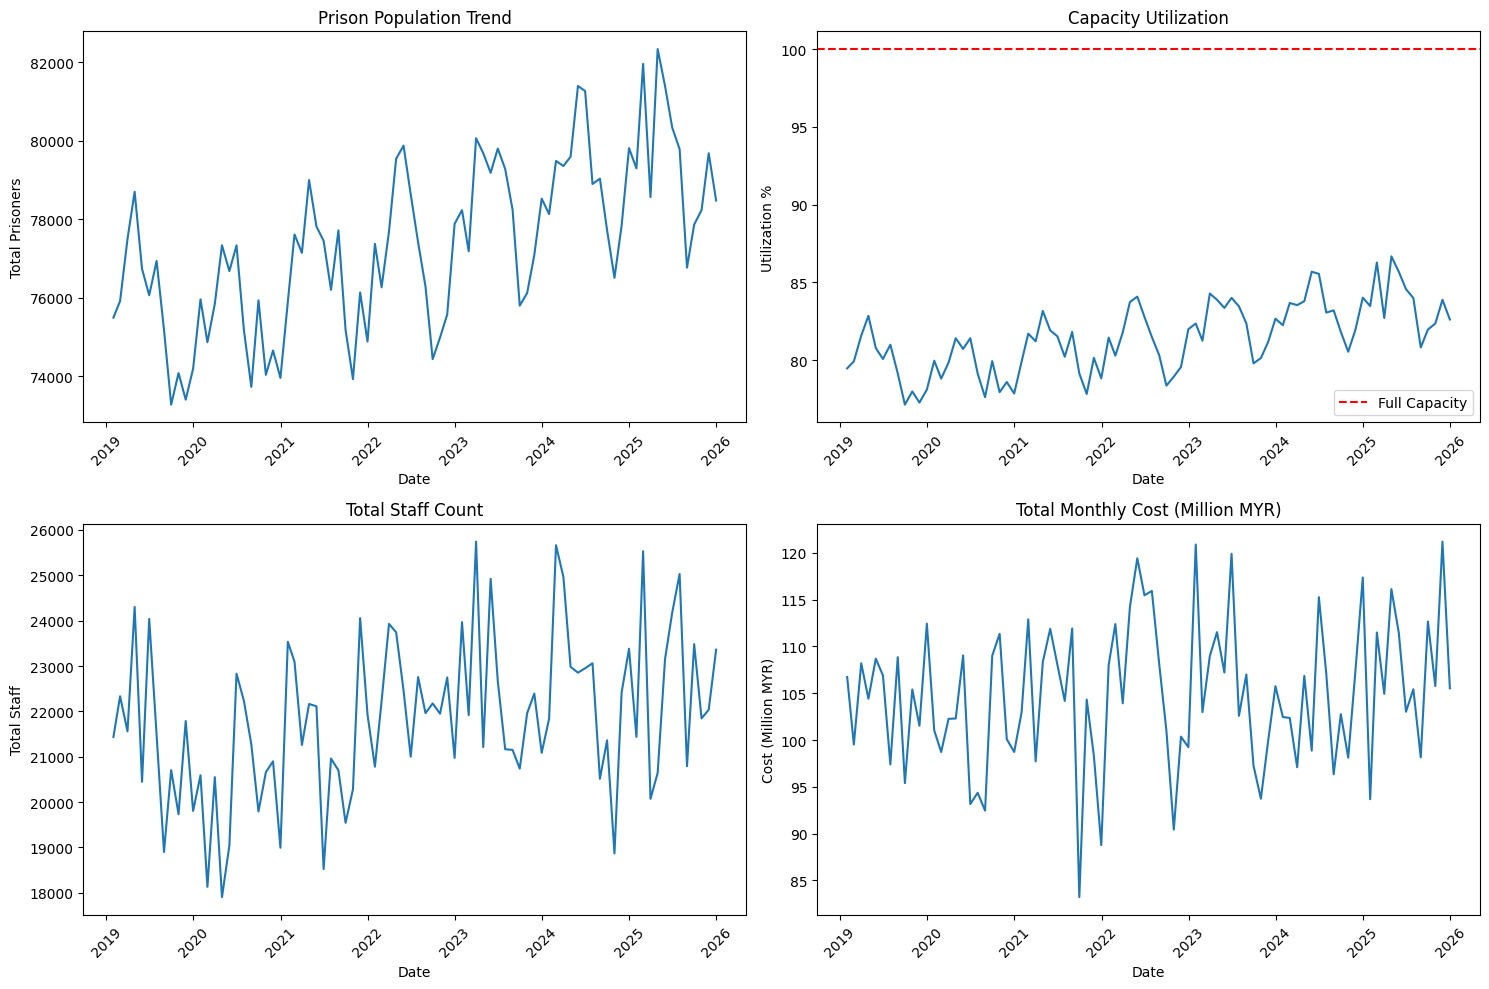

In [6]:
# Create visualizations
plt.figure(figsize=(15, 10))

# Population trend
plt.subplot(2, 2, 1)
plt.plot(population_df['date'], population_df['total_prisoners'])
plt.title('Prison Population Trend')
plt.xlabel('Date')
plt.ylabel('Total Prisoners')
plt.xticks(rotation=45)

# Capacity utilization
plt.subplot(2, 2, 2)
plt.plot(resource_df['date'], resource_df['capacity_utilization'])
plt.axhline(y=100, color='r', linestyle='--', label='Full Capacity')
plt.title('Capacity Utilization')
plt.xlabel('Date')
plt.ylabel('Utilization %')
plt.legend()
plt.xticks(rotation=45)

# Staff levels
plt.subplot(2, 2, 3)
plt.plot(staffing_df['date'], staffing_df['total_staff'])
plt.title('Total Staff Count')
plt.xlabel('Date')
plt.ylabel('Total Staff')
plt.xticks(rotation=45)

# Monthly costs
plt.subplot(2, 2, 4)
plt.plot(resource_df['date'], resource_df['total_monthly_cost'] / 1000000)
plt.title('Total Monthly Cost (Million MYR)')
plt.xlabel('Date')
plt.ylabel('Cost (Million MYR)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 5. Save Generated Data

In [7]:
# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Save datasets
population_df.to_csv('data/population_data.csv', index=False)
staffing_df.to_csv('data/staffing_data.csv', index=False)
resource_df.to_csv('data/resource_data.csv', index=False)

print("Data saved successfully!")
print(f"Population data: {population_df.shape[0]} records")
print(f"Staffing data: {staffing_df.shape[0]} records")
print(f"Resource data: {resource_df.shape[0]} records")

Data saved successfully!
Population data: 84 records
Staffing data: 84 records
Resource data: 84 records


## 6. Data Summary Statistics

In [8]:
print("Population Data Summary:")
print(population_df.describe())
print("\nStaffing Data Summary:")
print(staffing_df.describe())
print("\nResource Data Summary:")
print(resource_df.describe())

Population Data Summary:
                                date  total_prisoners  male_prisoners  \
count                             84        84.000000       84.000000   
mean   2022-07-16 00:51:25.714285824     77394.630952    65832.595238   
min              2019-01-31 00:00:00     73280.000000    60895.000000   
25%              2020-10-23 06:00:00     75916.000000    64021.250000   
50%              2022-07-15 12:00:00     77434.500000    65520.500000   
75%              2024-04-07 12:00:00     79011.250000    67343.000000   
max              2025-12-31 00:00:00     82339.000000    71070.000000   
std                              NaN      2118.848549     2481.966831   

       female_prisoners  young_prisoners  middle_prisoners  old_prisoners  \
count         84.000000        84.000000         84.000000      84.000000   
mean       11562.035714     19497.595238      42772.095238   15124.940476   
min         7803.000000     14709.000000      33235.000000    4635.000000   
25%      

## 7. Train Initial Models

In [9]:
# Import model training utilities
import sys
sys.path.append('..')

try:
    from models.model_trainer import train_all_models
    
    # Prepare data for training
    data_dict = {
        'population_data': population_df,
        'staffing_data': staffing_df,
        'resource_data': resource_df
    }
    
    # Train models
    print("Training models...")
    models = train_all_models(data_dict)
    print("Models trained successfully!")
    
except ImportError:
    print("Model training module not found. Please run the full application to train models.")
except Exception as e:
    print(f"Error training models: {e}")

Model training module not found. Please run the full application to train models.
